# Tutorial

This is a simple tutorial in how to use the baseline models using our implementations 

# Get Data

To get COVID-19 time-series data first go to the ```/src``` path and import the ```configures_manner``` and ```data_preparation``` modules.

In [1]:
import sys
sys.path.append("../src")

import configures_manner
import data_preparation

Than, define the data params.

In [4]:
repo = "p971074907"
path = "brl:rn"
feature = "deaths"
window_size = "7"
begin = "2020-01-01"
end = "2020-04-30"

Now, create a data preparation instance from ```data_preparation``` and use the ```get_data()```.

In [5]:
data_preparation_instance = data_preparation.DataPreparation()
data = data_preparation_instance.get_data(repo, path, feature, window_size, begin, end)

print("Data: \n", data)

Data: 
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   2.   2.
   2.   2.   2.   2.   2.   2.   2.   3.   3.   3.   3.   3.   3.   3.
   3.   3.   3.   3.   3.   3.   4.   4.   4.   4.   4.   4.   4.   4.
   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.
   4.   4.   4.   4.   4.   4.   4.   4.   5.   5.   5.   5.   5.   5.
   6.   6.   6.   6.   6.   7.   7.   7.   8.   8.   8.   8.  10.  10.
  10.  11.  11.  11.  11.  11.  11.  11.  11.  14.  14.  14.  14.  14.
  14.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  16.  15.  15.
  15.  16.  16.  16.  16.  16.  16.  17.  17.  17.  17.  17.  17.  17.
  18.  18.  18.  18.  19.  19.  19.  21.  21.  21.  21.  21.  22.  23.
  25.  25.  25.  26.  26.  27.  28.  28.  28.  30.  30.  30.  32.  34.
  34.  34.  33.  33.  33.  33.  34.  34.  35.  37.  37.  37.  39.  39.
  40.  41.  41.  41.  41.  42.  44.  45.  47.  47.  47.  47.  47.  47.
  47.  47.  48.  49.  49.  49.  50.  50.  51.  52.  52.  52.  52.  54

To use this data on our models, it must to be windowed. To do this, use the data preparation instance ```windowing_data()``` method.

In [6]:
# No arguments are necessary
windowed_data = data_preparation_instance.windowing_data()
print("Windowed data: \n", windowed_data)

Windowed data: 
 [[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  1.]
  [  1.]]

 [[  1.]
  [  1.]
  [  2.]
  [  2.]
  [  2.]
  [  2.]
  [  2.]]

 [[  2.]
  [  2.]
  [  2.]
  [  2.]
  [  3.]
  [  3.]
  [  3.]]

 [[  3.]
  [  3.]
  [  3.]
  [  3.]
  [  3.]
  [  3.]
  [  3.]]

 [[  3.]
  [  3.]
  [  3.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  5.]
  [  5.]]

 [[  5.]
  [  5.]
  [  5.]
  [  5.]
  [  6.]
  [  6.]
  [  6.]]

 [[  6.]
  [  6.]
  [  7.]
  [  7.]
  [  7.]
  [  8.]
  [  8.]]

 [[  8.]
  [  8.]
  [ 10.]
  [ 10.]
  [ 10.]
  [ 11.]
  [ 11.]]

 [[ 11.]
  [ 11.]
  [ 11.]
  [ 11.]
  [ 11.]
  [ 11.]
  [ 14.]]

 [[ 14.]
  [ 14.]
  [ 14.]
  [ 14.]
  [ 14.]
  [ 15.]
  [ 15.]]

 [[ 15.]
  [ 15.]
  [ 15.]
  [ 15.]
  [ 15.]
  [ 15.]
  [ 15.]]

 [[ 15.]

This type of model do not require train, so you can create a model instance and do predictions directly. 

Choose the model you want between Naive and Average.


$\begin{itemize}
\item Naive: just repeat the data from a input. Three ways had been implemented, to the forecast length seted up in 3 samples:
    \begin{itemize}
        \item random: input: [1, 2, 3, 4, 5] \rigtharrow output: [3, 2, 5]
        \item ordered: input: [1, 2, 3, 4, 5] \rigtharrow output: [1, 2, 3]
        \item inverted: input: [1, 2, 3, 4, 5] \rigtharrow output: [5, 4, 3]
    \end{itemize}
\item Average: Calculates a average (mean or median) from the data input. Two ways had been implemented, to the forecast length seted up in 3 samples using mean:
    \begin{itemize}
        \item first: input: [1, 2, 3, 4, 5] \rigtharrow output: [3, 3.4, 3.68]
        \item last: input: [1, 2, 3, 4, 5] \rigtharrow output: [3, 3.4, 3.68]
    \end{itemize}
\end{itemize}
$

In the average example the values are equal because the sample length to average calculation are the same. This can be changed with the model param ```calculation_average_lenght```.

To this examples we will use the average model. So, import the model manner (```average_manner```) and create a instance passing the arguments.


# Using average model

In [7]:
from models import average_manner
forecast_lenght = 7
calculation_average_lenght = 4 # to show the diffence between "begin" and "end" modes.
start_from = "first"
average_type = "mean"

average_model_instance = average_manner.ModelAverage(forecast_lenght, calculation_average_lenght, start_from, average_type)

Having the model instance created, call the ```predicting()``` instance method and pass the data as argument to get predictions.

In [8]:
yhat = average_model_instance.predicting(windowed_data)
print("Predictions: \n", yhat)

Predictions: 
 [[[0.000000e+00]
  [0.000000e+00]
  [2.500000e-01]
  [5.000000e-01]
  [5.000000e-01]
  [5.000000e-01]
  [3.125000e-01]]

 [[1.500000e+00]
  [1.750000e+00]
  [2.000000e+00]
  [2.000000e+00]
  [1.875000e+00]
  [1.812500e+00]
  [1.812500e+00]]

 [[2.000000e+00]
  [2.250000e+00]
  [2.500000e+00]
  [2.750000e+00]
  [2.750000e+00]
  [2.562500e+00]
  [2.437500e+00]]

 [[3.000000e+00]
  [3.000000e+00]
  [3.000000e+00]
  [3.000000e+00]
  [3.000000e+00]
  [3.000000e+00]
  [3.000000e+00]]

 [[3.250000e+00]
  [3.500000e+00]
  [3.750000e+00]
  [4.000000e+00]
  [3.812500e+00]
  [3.687500e+00]
  [3.625000e+00]]

 [[4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]]

 [[4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]]

 [[4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [4.000000e+00]]

 [[4.000000e+00]


To visualize the data and predictions, import the pyplot from matplot lib and plot them.

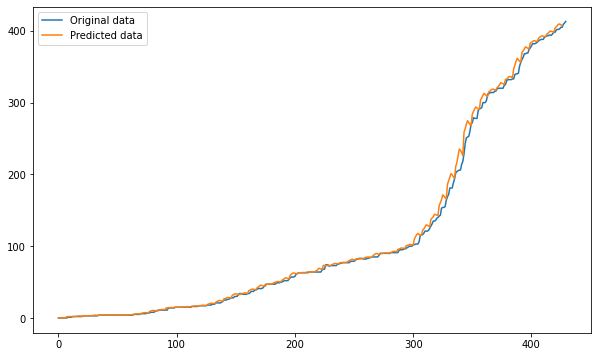

In [9]:
import matplotlib.pyplot as plt

#reshape the data and the yhat
plt.figure(figsize=(10, 6))
data_to_plot = data.reshape(-1)
yhat_to_plot = yhat.reshape(-1)
plt.plot(data_to_plot, label="Original data")
plt.plot(yhat_to_plot, label="Predicted data")
plt.legend(loc='best')
plt.show()

As said, to show the difference between the "begin" and "end" average calculation arguments, the next example use the "end" mode.

In [10]:
forecast_lenght = 7
calculation_average_lenght = 4 # to show the diffence between "begin" and "end" modes.
start_from = "last"
average_type = "mean"

average_model_instance = average_manner.ModelAverage(forecast_lenght, calculation_average_lenght, start_from, average_type)

yhat = average_model_instance.predicting(windowed_data)
print("Predictions: \n", yhat)

Predictions: 
 [[[  0.5       ]
  [  0.625     ]
  [  0.78125   ]
  [  0.7265625 ]
  [  0.65820312]
  [  0.69775391]
  [  0.71594238]]

 [[  2.        ]
  [  2.        ]
  [  2.        ]
  [  2.        ]
  [  2.        ]
  [  2.        ]
  [  2.        ]]

 [[  2.75      ]
  [  2.9375    ]
  [  2.921875  ]
  [  2.90234375]
  [  2.87792969]
  [  2.90991211]
  [  2.90301514]]

 [[  3.        ]
  [  3.        ]
  [  3.        ]
  [  3.        ]
  [  3.        ]
  [  3.        ]
  [  3.        ]]

 [[  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]]

 [[  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]]

 [[  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]]

 [[  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]
  [  4.        ]]

 [[  4.5       ]


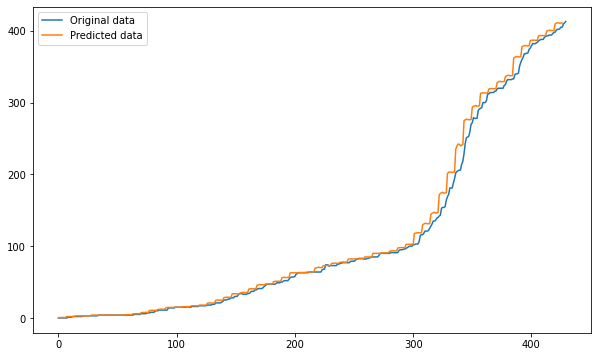

In [11]:
#reshape the data and the yhat
plt.figure(figsize=(10, 6))
data_to_plot = data.reshape(-1)
yhat_to_plot = yhat.reshape(-1)
plt.plot(data_to_plot, label="Original data")
plt.plot(yhat_to_plot, label="Predicted data")
plt.legend(loc='best')
plt.show()

# Using naive model

To use a naive model, the procedure is similar.

In [12]:
from models import naive_manner

#only two arguments
forecast_lenght = 7
naive_mode = "random"

naive_model_instance = naive_manner.ModelNaive(forecast_lenght, naive_mode)

yhat = naive_model_instance.predicting(windowed_data)
print("Predictions: \n", yhat)

Predictions: 
 [[[  1.]
  [  0.]
  [  1.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  2.]
  [  1.]
  [  1.]
  [  1.]
  [  1.]
  [  2.]
  [  2.]]

 [[  2.]
  [  2.]
  [  2.]
  [  3.]
  [  2.]
  [  3.]
  [  2.]]

 [[  3.]
  [  3.]
  [  3.]
  [  3.]
  [  3.]
  [  3.]
  [  3.]]

 [[  4.]
  [  4.]
  [  4.]
  [  3.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  5.]
  [  4.]
  [  5.]
  [  4.]
  [  4.]
  [  4.]]

 [[  6.]
  [  6.]
  [  5.]
  [  6.]
  [  6.]
  [  5.]
  [  5.]]

 [[  7.]
  [  6.]
  [  7.]
  [  7.]
  [  7.]
  [  7.]
  [  7.]]

 [[ 10.]
  [ 10.]
  [  8.]
  [  8.]
  [  8.]
  [ 10.]
  [ 10.]]

 [[ 14.]
  [ 14.]
  [ 11.]
  [ 14.]
  [ 11.]
  [ 11.]
  [ 11.]]

 [[ 15.]
  [ 15.]
  [ 15.]
  [ 14.]
  [ 14.]
  [ 14.]
  [ 14.]]

 [[ 15.]
  [ 15.]
  [ 15.]
  [ 15.]
  [ 15.]
  [ 15.]
  [ 15.]]

 [[ 15.]
 

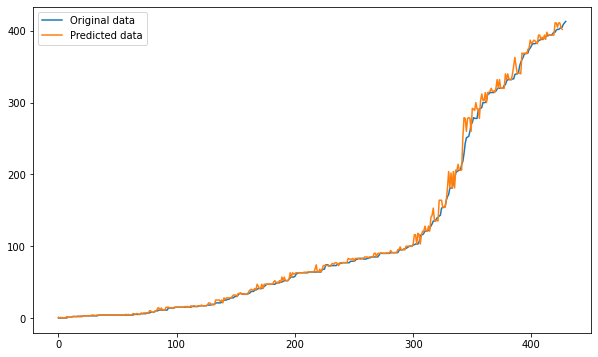

In [13]:
#reshape the data and the yhat
plt.figure(figsize=(10, 6))
data_to_plot = data.reshape(-1)
yhat_to_plot = yhat.reshape(-1)
plt.plot(data_to_plot, label="Original data")
plt.plot(yhat_to_plot, label="Predicted data")
plt.legend(loc='best')
plt.show()

Using another naive mode.

In [14]:
#only two arguments
forecast_lenght = 7
naive_mode = "inverted"

naive_model_instance = naive_manner.ModelNaive(forecast_lenght, naive_mode)

yhat = naive_model_instance.predicting(windowed_data)
print("Predictions: \n", yhat)

Predictions: 
 [[[  1.]
  [  1.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  2.]
  [  2.]
  [  2.]
  [  2.]
  [  2.]
  [  1.]
  [  1.]]

 [[  3.]
  [  3.]
  [  3.]
  [  2.]
  [  2.]
  [  2.]
  [  2.]]

 [[  3.]
  [  3.]
  [  3.]
  [  3.]
  [  3.]
  [  3.]
  [  3.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  3.]
  [  3.]
  [  3.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  5.]
  [  5.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]
  [  4.]]

 [[  6.]
  [  6.]
  [  6.]
  [  5.]
  [  5.]
  [  5.]
  [  5.]]

 [[  8.]
  [  8.]
  [  7.]
  [  7.]
  [  7.]
  [  6.]
  [  6.]]

 [[ 11.]
  [ 11.]
  [ 10.]
  [ 10.]
  [ 10.]
  [  8.]
  [  8.]]

 [[ 14.]
  [ 11.]
  [ 11.]
  [ 11.]
  [ 11.]
  [ 11.]
  [ 11.]]

 [[ 15.]
  [ 15.]
  [ 14.]
  [ 14.]
  [ 14.]
  [ 14.]
  [ 14.]]

 [[ 15.]
  [ 15.]
  [ 15.]
  [ 15.]
  [ 15.]
  [ 15.]
  [ 15.]]

 [[ 16.]
 

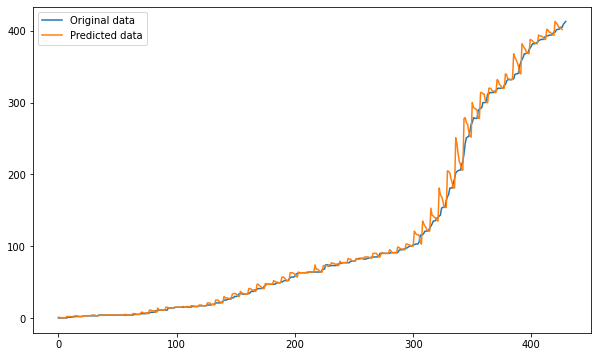

In [15]:
#reshape the data and the yhat
plt.figure(figsize=(10, 6))
data_to_plot = data.reshape(-1)
yhat_to_plot = yhat.reshape(-1)
plt.plot(data_to_plot, label="Original data")
plt.plot(yhat_to_plot, label="Predicted data")
plt.legend(loc='best')
plt.show()

# Doing a grid search

To do a grid search, firstly create a evaluator instance from ```evaluator_manner``` class. To create it, you need to pass the data params due to the nature of this class, developed to work in a server, waiting a post request.

In [16]:
import evaluator_manner
import configures_manner

# definning the data configs

# this values was previously defined in the initial cells from this tutorial.

evaluator_instance = evaluator_manner.Evaluator()

Having the evaluator instance created, change the ```configure_grid_search.json``` file on the ```/doc/``` path, as in the examples (```/doc/configures_json_examples``` path).

Call the ```grid_search_from_configures()``` method from instance.

In [17]:
# if you want, save a json file with the models scores and params changing the 'save_file' boolean to True.

# The variable grid search is a dictioanry with the results.
grid_serach = evaluator_instance.grid_search_from_local_configures(save_file=False)

print("Grid Search: \n", grid_serach)

Grid Search: 
 {'model_index_0': {'instance_id': 'd359e1f6-f7ff-11ec-b3a8-0be4ab65e546', 'score': 10.085503553121876, 'model_category': 'baseline', 'model_type': 'average', 'data_of_training': '2022-06-29 20:04:27', 'data_infos': {'path': 'brl:rn', 'repo': 'p971074907', 'data_begin_date': '2020-01-01', 'data_end_date': '2020-04-15', 'inputFeatures': 'deaths', 'inputWindowSize': '7'}, 'params': {'forecast_average_lenght': 7, 'calculation_average_lenght': 7, 'start_from': 'first', 'average_type': 'mean'}}, 'model_index_1': {'instance_id': 'd3614e8c-f7ff-11ec-b3a8-0be4ab65e546', 'score': 11.877048695458216, 'model_category': 'baseline', 'model_type': 'average', 'data_of_training': '2022-06-29 20:04:27', 'data_infos': {'path': 'brl:rn', 'repo': 'p971074907', 'data_begin_date': '2020-01-01', 'data_end_date': '2020-04-15', 'inputFeatures': 'deaths', 'inputWindowSize': '7'}, 'params': {'forecast_average_lenght': 7, 'calculation_average_lenght': 7, 'start_from': 'first', 'average_type': 'media

To get the best scored model: 

In [18]:
best_model = evaluator_instance.get_best_model(grid_serach)
best_model

{'instance_id': 'd359e1f6-f7ff-11ec-b3a8-0be4ab65e546',
 'score': 10.085503553121876,
 'model_category': 'baseline',
 'model_type': 'average',
 'data_of_training': '2022-06-29 20:04:27',
 'data_infos': {'path': 'brl:rn',
  'repo': 'p971074907',
  'data_begin_date': '2020-01-01',
  'data_end_date': '2020-04-15',
  'inputFeatures': 'deaths',
  'inputWindowSize': '7'},
 'params': {'forecast_average_lenght': 7,
  'calculation_average_lenght': 7,
  'start_from': 'first',
  'average_type': 'mean'}}